In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import networkx as nx
import random

//anaconda/envs/python36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
u = "/Users/xiaoyu/PycharmProjects/A-fast-method/auto_data/"

In [58]:
def calcu_distance(data, num_train=50):
    '''
    data: [[p, q, P, Q, M, r2]]
    '''
    df = pd.DataFrame(data, columns=['p', 'q', 'P', 'Q', 'M', 'r2'])
    
    # 随机生成训练集和测试集
    num_tol = len(data)
    idx_cont = np.arange(num_tol)
    idx_train = np.random.choice(idx_cont, size=num_train, replace=False)  # for the training set
    idx_test = np.array([i for i in idx_cont if i not in idx_train])  # the remaining is the test set
    train_set = df.loc[idx_train, ['p', 'q', 'P', 'Q']]
    test_set = df.loc[idx_test, ['p', 'q', 'P', 'Q']]
    
    # 预测 p
    result_p = smf.ols('p ~ P-1', data=train_set).fit()
    k_p = result_p.params['P']
    r2_p = result_p.rsquared
    train_set['pred_p'] = k_p * train_set['P']
    test_set['pred_p'] = k_p * test_set['P']
    
    # 预测 q
    result_q = smf.ols('q ~ Q-1', data=train_set).fit()
    k_q = result_q.params['Q']
    r2_q = result_q.rsquared
    train_set['pred_q'] = k_q * train_set['Q']
    test_set['pred_q'] = k_q * test_set['Q']
    
    # 测试集中预测点和实际点之前的距离
    dis_train = np.sqrt((train_set['p'] - train_set['pred_p']) ** 2 
                                      + (train_set['q'] - train_set['pred_q']) ** 2)
    
    dis_test = np.sqrt((test_set['p'] - test_set['pred_p']) ** 2 
                                      + (test_set['q'] - test_set['pred_q']) ** 2)
    
    return dis_train, dis_test

In [3]:
coeff_cont_gnm = np.load(u +"estimate_gnm_random_graph(10000,30000).npy")

In [4]:
df = pd.DataFrame(coeff_cont_gnm, columns=['p', 'q', 'P', 'Q', 'M', 'r2'])

In [17]:
df.p[1]

0.00038000000000000008

In [7]:
np.random.random(100)

array([ 0.93650192,  0.43715499,  0.44583184,  0.39029592,  0.07179651,
        0.89721066,  0.56451631,  0.50620184,  0.45762912,  0.14422405,
        0.77740879,  0.1007822 ,  0.33661231,  0.68379565,  0.37807349,
        0.04682607,  0.88884482,  0.69594574,  0.59016909,  0.81012765,
        0.75539555,  0.26001813,  0.17471035,  0.02668568,  0.32745221,
        0.87906873,  0.70788046,  0.39926874,  0.95138699,  0.79884795,
        0.53002662,  0.03972305,  0.29699794,  0.49977928,  0.45222103,
        0.89129425,  0.78112336,  0.07287609,  0.95392489,  0.66491344,
        0.97613388,  0.45493332,  0.82832033,  0.22355973,  0.25332517,
        0.81260895,  0.62477515,  0.09042568,  0.5525706 ,  0.15330352,
        0.74788285,  0.34288815,  0.71669819,  0.84708989,  0.15036005,
        0.68578148,  0.95674264,  0.37263123,  0.87929402,  0.16865192,
        0.92307555,  0.32915211,  0.83772294,  0.18336758,  0.36573977,
        0.34606906,  0.85839609,  0.02102817,  0.6208789 ,  0.58

In [48]:
def grid_distance(data, num_samp=10000):
    df = pd.DataFrame(data, columns=['p', 'q', 'P', 'Q', 'M', 'r2'])
    min_p, max_p = df.p.min(), df.p.max()
    min_q, max_q = df.q.min(), df.q.max()
    samp_p = (max_p - min_p) * np.random.random(num_samp) + min_p
    samp_q = (max_q - min_q) * np.random.random(num_samp) + min_q
    d_cont = []
    for i in df.index:
        d = np.mean(np.sqrt(np.square(samp_p - df.p[i]) + np.square(samp_q - df.q[i])))
        d_cont.append(d)
    
    return np.mean(d_cont)

In [49]:
x = grid_distance(coeff_cont_gnm, num_samp=10000)
print('%.5f' % x)

0.01774


$p=k_1\cdot P$

$q=k_2\cdot Q$

$D(\mathrm{fit, predict}) = \sqrt{(\hat p - p)^2 + (\hat q - q)^2}$

### 1. topology

In [50]:
coeff_cont_gnm = np.load(u +"estimate_gnm_random_graph(10000,30000).npy")
coeff_cont_ba =  np.load(u +"estimate_barabasi_albert_graph(10000,3).npy")
coeff_cont_exp = np.load(u +"estimate_exponential_graph(10000,3).npy")
coeff_cont_gua = np.load(u +"estimate_gaussian_graph(10000,3).npy")
coeff_cont_log = np.load(u +"estimate_lognormal_graph(10000,3).npy")
coeff_cont_full = np.load(u+"estimate_complete_graph(10000).npy")
coeff_cont_ws0 =  np.load(u +"estimate_watts_strogatz_graph(10000,6,0).npy")
coeff_cont_ws01 = np.load(u +"estimate_watts_strogatz_graph(10000,6,0.1).npy")
coeff_cont_ws03 = np.load(u +"estimate_watts_strogatz_graph(10000,6,0.3).npy")
coeff_cont_ws05 = np.load(u +"estimate_watts_strogatz_graph(10000,6,0.5).npy")
coeff_cont_ws07 = np.load(u +"estimate_watts_strogatz_graph(10000,6,0.7).npy")
coeff_cont_ws09 = np.load(u +"estimate_watts_strogatz_graph(10000,6,0.9).npy")
coeff_cont_ws10 = np.load(u +"estimate_watts_strogatz_graph(10000,6,1.0).npy")

In [51]:
d_cont = [coeff_cont_log, coeff_cont_ba, coeff_cont_exp, coeff_cont_gua,
          coeff_cont_gnm, coeff_cont_full,
          coeff_cont_ws0, coeff_cont_ws01, coeff_cont_ws03,
          coeff_cont_ws05, coeff_cont_ws07, coeff_cont_ws09, coeff_cont_ws10]

title_cont = ['LOG','BA','EXP','GAU','ER', 'Full', 'WS-0','WS-0.1','WS-0.3','WS-0.5','WS-0.7','WS-0.9','WS-1']

In [143]:
mean_r2 = [np.mean(x[:, 5]) for x in d_cont]
std_r2 = [np.std(x[:, 5]) for x in d_cont]

for i, x in enumerate(zip(mean_r2, std_r2)):
    print(title_cont[i], '\t' ,'%6.4f, %.4f' % tuple(x))

LOG 	 0.9959, 0.0042
BA 	 0.9920, 0.0037
EXP 	 0.9988, 0.0016
GAU 	 0.9993, 0.0004
ER 	 0.9992, 0.0005
Full 	 0.9988, 0.0011
WS-0 	 0.9746, 0.0149
WS-0.1 	 0.9947, 0.0025
WS-0.3 	 0.9975, 0.0026
WS-0.5 	 0.9987, 0.0007
WS-0.7 	 0.9988, 0.0007
WS-0.9 	 0.9989, 0.0007
WS-1 	 0.9988, 0.0007


#### (1) P and p

In [69]:
res_p = []
for i, title in enumerate(title_cont):
    X_data = d_cont[i][:, 2]
    Y_data = d_cont[i][:, 0]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s || R2: %.4f, beta: %.2E' %(title, r2, a))
    res_p.append([r2, a])

LOG || R2: 0.9952, beta: 5.56E-01
BA || R2: 0.9908, beta: 6.09E-01
EXP || R2: 0.9989, beta: 7.33E-01
GAU || R2: 0.9985, beta: 7.98E-01
ER || R2: 0.9986, beta: 8.06E-01
Full || R2: 0.9941, beta: 1.45E+00
WS-0 || R2: 0.9624, beta: 4.27E-01
WS-0.1 || R2: 0.9919, beta: 6.05E-01
WS-0.3 || R2: 0.9969, beta: 7.32E-01
WS-0.5 || R2: 0.9964, beta: 7.70E-01
WS-0.7 || R2: 0.9966, beta: 7.81E-01
WS-0.9 || R2: 0.9966, beta: 7.88E-01
WS-1 || R2: 0.9970, beta: 7.85E-01


In [77]:
res_p

[[0.99522622448136866, 0.55568727641227522],
 [0.99082137889934496, 0.60894267762423526],
 [0.99887528322697472, 0.73283401029109219],
 [0.99852502319102321, 0.7981978930451944],
 [0.99855969562511127, 0.80561267363268196],
 [0.99412493752235043, 1.4545755211615694],
 [0.9624062376065835, 0.42747195607944366],
 [0.99193796251663846, 0.60507789242274879],
 [0.99687004623341069, 0.73191083981641181],
 [0.99641623563192661, 0.77007107974157629],
 [0.99659674939173903, 0.78146541806972447],
 [0.99659134890015799, 0.78753218233808653],
 [0.99698091140381551, 0.78502607563362548]]

#### (2) Q and q

In [70]:
res_q = []
for i, title in enumerate(title_cont):
    X_data = d_cont[i][:, 3]
    Y_data = d_cont[i][:, 1]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s || R2: %.4f, beta: %.2E' %(title, r2, a))
    res_q.append([r2, a])

LOG || R2: 0.9883, beta: 7.70E-02
BA || R2: 0.9916, beta: 1.27E-01
EXP || R2: 0.9958, beta: 1.29E-01
GAU || R2: 0.9996, beta: 1.71E-01
ER || R2: 0.9991, beta: 1.97E-01
Full || R2: 0.9987, beta: 1.12E-04
WS-0 || R2: 0.8970, beta: 3.62E-01
WS-0.1 || R2: 0.9769, beta: 3.03E-01
WS-0.3 || R2: 0.9917, beta: 2.49E-01
WS-0.5 || R2: 0.9975, beta: 2.29E-01
WS-0.7 || R2: 0.9984, beta: 2.22E-01
WS-0.9 || R2: 0.9984, beta: 2.20E-01
WS-1 || R2: 0.9985, beta: 2.20E-01


#### (3) Cross-validation

In [69]:
res_dict = {}
for i, title in enumerate(title_cont):
    res_cont = []
    data = d_cont[i]
    for j in range(100):
        dis_train, dis_test = calcu_distance(data, num_train=9)      
        res_cont.append([(np.mean(dis_train), np.std(dis_train)),
                         (np.mean(dis_test), np.std(dis_test))])
    res_dict[title] = res_cont

In [70]:
for i, title in enumerate(title_cont):
    d = res_dict[title]
    mean_train = d[:][0][0]
    std_train = d[:][0][1]
    
    mean_test = d[:][1][0]
    std_test = d[:][1][1]
    
    print('%s' % title, end='\t')
    print('  Train: %.5f (%.6f)' % (np.mean(mean_train), np.std(mean_train)), end='\t')
    print('  Test: %.5f (%.6f)' % (np.mean(mean_test), np.std(mean_test)))

LOG	  Train: 0.00332 (0.000317)	  Test: 0.00691 (0.001447)
BA	  Train: 0.00153 (0.000352)	  Test: 0.00176 (0.000616)
EXP	  Train: 0.00252 (0.000013)	  Test: 0.00083 (0.000240)
GAU	  Train: 0.00077 (0.000179)	  Test: 0.00102 (0.000312)
ER	  Train: 0.00224 (0.000737)	  Test: 0.00236 (0.000124)
Full	  Train: 0.00122 (0.000127)	  Test: 0.00065 (0.000127)
WS-0	  Train: 0.03455 (0.007568)	  Test: 0.04138 (0.001114)
WS-0.1	  Train: 0.01190 (0.001929)	  Test: 0.01401 (0.004204)
WS-0.3	  Train: 0.00644 (0.000430)	  Test: 0.00726 (0.000303)
WS-0.5	  Train: 0.00254 (0.000367)	  Test: 0.00273 (0.000990)
WS-0.7	  Train: 0.00414 (0.000092)	  Test: 0.00277 (0.000633)
WS-0.9	  Train: 0.00259 (0.000203)	  Test: 0.00237 (0.000609)
WS-1	  Train: 0.00327 (0.000048)	  Test: 0.00401 (0.000321)


#### (4) 和随机抽取点进行对比

In [52]:
for i, title in enumerate(title_cont):
    data = d_cont[i]
    x = grid_distance(data)
    print('%s' % title, end='\t')
    print('%.5f' % x)

LOG	0.01421
BA	0.01820
EXP	0.01595
GAU	0.01624
ER	0.01774
Full	0.01658
WS-0	0.01961
WS-0.1	0.01652
WS-0.3	0.01615
WS-0.5	0.03002
WS-0.7	0.02988
WS-0.9	0.03014
WS-1	0.03011


#### (5) 绘图

In [158]:
def voilin_plot(ax, d_cont, positions, title=False, xlabel=False, ylabel=False):
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=15)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=15)
    if title:
        ax.set_title(title, fontsize=15)
        
    #ax.axhline(1, color='gray', ls='--', lw=1)
    ax.set_ylim([0.92, 1.02])
    #ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
    ax.violinplot(d_cont, showmedians=False, showmeans=True, showextrema=False, widths=0.5, positions=positions)
    for i, d in enumerate(d_cont):
        textstr = '%.4f\n(%.4f)' % (np.mean(d), np.std(d))
        ax.text(i + 0.6, np.mean(d), textstr, fontsize=10, verticalalignment='center', color='k', alpha=0.5)

In [172]:
def line_plot(ax, d_cont, positions, title=False, xlabel=False, ylabel=False):
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=15)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=15)
    if title:
        ax.set_title(title, fontsize=15)
    
    r_cont = [d[0] for d in d_cont]
    #ax.axhline(1, color='gray', ls='--', lw=1)
    ax.plot(positions, r_cont, 'k--', lw=1, alpha=0.4)
    ax.scatter(positions, r_cont, marker='o', s=60, alpha=0.8, lw=1)
        
    for i, d in enumerate(d_cont):
        text = '%.4f\n{%.1e}'% tuple(d)
        ax.text(i + 0.6, d[0], text, fontsize=10, verticalalignment='center', color='k', alpha=0.5)

In [137]:
positions = np.arange(1, len(title_cont) + 1)
r_cont1 = [v[:,-1] for v in d_cont]

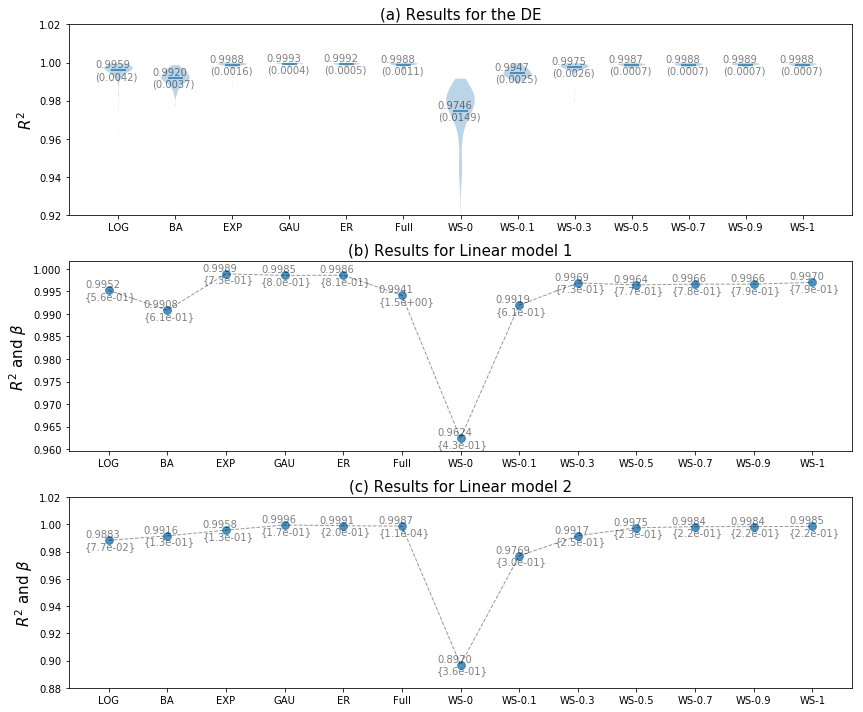

In [174]:
fig = pl.figure(figsize=(12, 10))

ax1 = fig.add_subplot(3, 1, 1)
voilin_plot(ax1, r_cont1, positions, title='(a) Results for the DE', ylabel='$R^2$')
ax1.set_xticklabels([])

ax2 = fig.add_subplot(3, 1, 2)
line_plot(ax2, res_p, positions, title='(b) Results for Linear model 1', ylabel=r'$R^2$ and $\beta$')
ax3.set_ylim([0.88, 1.02])
ax2.set_xticklabels([])

ax3 = fig.add_subplot(3, 1, 3)
line_plot(ax3, res_q, positions, title='(c) Results for Linear model 2', ylabel=r'$R^2$ and $\beta$')
ax3.set_ylim([0.88, 1.02])

pl.setp(ax1, xticks=positions, xticklabels=title_cont)
pl.setp(ax2, xticks=positions, xticklabels=title_cont)
pl.setp(ax3, xticks=positions, xticklabels=title_cont)
pl.tight_layout()

### 2.  average degree

In [54]:
coeff_cont_gnm_3 = np.load(u + "estimate_gnm_random_graph(10000,30000).npy")
coeff_cont_gnm_4 = np.load(u + "estimate_gnm_random_graph(10000,40000).npy")
coeff_cont_gnm_5 = np.load(u + "estimate_gnm_random_graph(10000,50000).npy")
coeff_cont_gnm_6 = np.load(u + "estimate_gnm_random_graph(10000,60000).npy")
coeff_cont_gnm_7 = np.load(u + "estimate_gnm_random_graph(10000,70000).npy")
coeff_cont_gnm_8 = np.load(u + "estimate_gnm_random_graph(10000,80000).npy")
coeff_cont_gnm_9 = np.load(u + "estimate_gnm_random_graph(10000,90000).npy")
coeff_cont_gnm_10 = np.load(u + "estimate_gnm_random_graph(10000,100000).npy")

In [55]:
d_cont2 = [coeff_cont_gnm_3,coeff_cont_gnm_4,coeff_cont_gnm_5,coeff_cont_gnm_6,
                     coeff_cont_gnm_7,coeff_cont_gnm_8,coeff_cont_gnm_9,coeff_cont_gnm_10]
title_cont2 = ['gnm3', 'gnm4', 'gnm5', 'gnm6', 'gnm7', 'gnm8', 'gnm9', 'gnm10']

In [10]:
mean_r2 = [np.mean(x[:, 5]) for x in d_cont2]
std_r2 = [np.std(x[:, 5]) for x in d_cont2]

for i, x in enumerate(zip(mean_r2, std_r2)):
    print(title_cont2[i], '\t' ,'%6.4f, %.4f' % tuple(x))

gnm3 	 0.9992, 0.0005
gnm4 	 0.9992, 0.0005
gnm5 	 0.9993, 0.0004
gnm6 	 0.9994, 0.0004
gnm7 	 0.9994, 0.0004
gnm8 	 0.9995, 0.0004
gnm9 	 0.9994, 0.0004
gnm10 	 0.9995, 0.0004


#### (1) P and p

In [14]:
for i, title in enumerate(title_cont2):
    X_data = d_cont2[i][:, 2]
    Y_data = d_cont2[i][:, 0]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s \n R2: %.4f, beta: %.2f' %(title, r2, a))

gnm3 
 R2: 0.9986, beta: 0.81
gnm4 
 R2: 0.9986, beta: 0.83
gnm5 
 R2: 0.9987, beta: 0.85
gnm6 
 R2: 0.9989, beta: 0.86
gnm7 
 R2: 0.9989, beta: 0.87
gnm8 
 R2: 0.9987, beta: 0.88
gnm9 
 R2: 0.9990, beta: 0.88
gnm10 
 R2: 0.9988, beta: 0.88


#### (2) Q and q

In [15]:
for i, title in enumerate(title_cont2):
    X_data = d_cont2[i][:, 3]
    Y_data = d_cont2[i][:, 1]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s \n R2: %.4f, beta: %.2f' %(title, r2, a))

gnm3 
 R2: 0.9991, beta: 0.20
gnm4 
 R2: 0.9993, beta: 0.15
gnm5 
 R2: 0.9995, beta: 0.11
gnm6 
 R2: 0.9995, beta: 0.09
gnm7 
 R2: 0.9994, beta: 0.08
gnm8 
 R2: 0.9994, beta: 0.07
gnm9 
 R2: 0.9995, beta: 0.06
gnm10 
 R2: 0.9995, beta: 0.06


### (3) Cross-validation

In [63]:
res_dict2 = {}
for i, title in enumerate(title_cont2):
    res_cont = []
    data = d_cont2[i]
    for j in range(100):
        dis_train, dis_test = calcu_distance(data, num_train=9)      
        res_cont.append([(np.mean(dis_train), np.std(dis_train)),
                         (np.mean(dis_test), np.std(dis_test))])
        
    res_dict2[title] = res_cont

In [64]:
for i, title in enumerate(title_cont2):
    d = res_dict2[title]
    mean_train = d[:][0][0]
    std_train = d[:][0][1]
    
    mean_test = d[:][1][0]
    std_test = d[:][1][1]
    
    print('%s' % title, end='\t')
    print('  Train: %.5f (%.6f)' % (np.mean(mean_train), np.std(mean_train)), end='\t')
    print('  Test: %.5f (%.6f)' % (np.mean(mean_test), np.std(mean_test)))

gnm3	  Train: 0.00137 (0.000376)	  Test: 0.00217 (0.000100)
gnm4	  Train: 0.00058 (0.000149)	  Test: 0.00101 (0.000199)
gnm5	  Train: 0.00082 (0.000292)	  Test: 0.00071 (0.000191)
gnm6	  Train: 0.00038 (0.000109)	  Test: 0.00087 (0.000286)
gnm7	  Train: 0.00031 (0.000221)	  Test: 0.00092 (0.000077)
gnm8	  Train: 0.00049 (0.000121)	  Test: 0.00054 (0.000282)
gnm9	  Train: 0.00085 (0.000192)	  Test: 0.00043 (0.000130)
gnm10	  Train: 0.00048 (0.000203)	  Test: 0.00047 (0.000193)


#### (4) 和随机抽取点对比

In [66]:
for i, title in enumerate(title_cont2):
    data = d_cont2[i]
    x = grid_distance(data)
    print('%s' % title, end='\t')
    print('%.5f' % x)

gnm3	0.01768
gnm4	0.01485
gnm5	0.01330
gnm6	0.01246
gnm7	0.01284
gnm8	0.01232
gnm9	0.01089
gnm10	0.01129


### 3. decision rule

In [71]:
coeff_cont_gnm01 = np.load(u +"estimate_gnm_random_graph(10000,30000),0.1.npy")
coeff_cont_gnm03 = np.load(u +"estimate_gnm_random_graph(10000,30000),0.3.npy")
coeff_cont_gnm05 = np.load(u +"estimate_gnm_random_graph(10000,30000),0.5.npy")
coeff_cont_gnm07 = np.load(u +"estimate_gnm_random_graph(10000,30000),0.7.npy")
coeff_cont_gnm09 = np.load(u +"estimate_gnm_random_graph(10000,30000),0.9.npy")
coeff_cont_gnm10 = np.load(u +"estimate_gnm_random_graph(10000,30000),1.0.npy")

In [72]:
d_cont3 = [coeff_cont_gnm01,coeff_cont_gnm03,coeff_cont_gnm05,coeff_cont_gnm07,coeff_cont_gnm09,coeff_cont_gnm10]
title_cont3 = ['alpha0.1', 'alpha0.3', 'alpha0.5', 'alpha0.7', 'alpha0.9', 'alpha1.0']

In [13]:
mean_r2 = [np.mean(x[:, 5]) for x in d_cont3]
std_r2 = [np.std(x[:, 5]) for x in d_cont3]

for i, x in enumerate(zip(mean_r2, std_r2)):
    print(title_cont3[i], '\t' ,'%6.4f, %.4f' % tuple(x))

alpha0.1 	 0.9991, 0.0005
alpha0.3 	 0.9991, 0.0005
alpha0.5 	 0.9987, 0.0013
alpha0.7 	 0.9989, 0.0007
alpha0.9 	 0.9987, 0.0012
alpha1.0 	 0.9989, 0.0007


#### (1) P and p

In [18]:
for i, title in enumerate(title_cont3):
    X_data = d_cont3[i][:, 2]
    Y_data = d_cont3[i][:, 0]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s \n R2: %.4f, beta: %.2f' %(title, r2, a))

alpha0.1 
 R2: 0.9986, beta: 0.81
alpha0.3 
 R2: 0.9986, beta: 0.81
alpha0.5 
 R2: 0.9985, beta: 0.81
alpha0.7 
 R2: 0.9987, beta: 0.82
alpha0.9 
 R2: 0.9984, beta: 0.80
alpha1.0 
 R2: 0.9985, beta: 0.80


#### (2) Q and q

In [19]:
for i, title in enumerate(title_cont3):
    X_data = d_cont3[i][:, 3]
    Y_data = d_cont3[i][:, 1]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s \n R2: %.4f, beta: %.2f' %(title, r2, a))

alpha0.1 
 R2: 0.9993, beta: 0.24
alpha0.3 
 R2: 0.9992, beta: 0.36
alpha0.5 
 R2: 0.9954, beta: 0.54
alpha0.7 
 R2: 0.9990, beta: 0.79
alpha0.9 
 R2: 0.9951, beta: 1.17
alpha1.0 
 R2: 0.9989, beta: 1.41


In [35]:
res_dict3 = {}
for i, title in enumerate(title_cont3):
    res_cont = []
    data = d_cont3[i]
    for j in range(100):
        dis_train, dis_test = calcu_distance(data, num_train=9)      
        res_cont.append([(np.mean(dis_train), np.std(dis_train)),
                         (np.mean(dis_test), np.std(dis_test))])
    res_dict3[title] = res_cont

In [36]:
for i, title in enumerate(title_cont3):
    d = res_dict3[title]
    mean_train = d[:][0][0]
    std_train = d[:][0][1]
    
    mean_test = d[:][1][0]
    std_test = d[:][1][1]
    
    print('%s' % title, end='\t')
    print('  Train: %.5f (%.6f)' % (np.mean(mean_train), np.std(mean_train)), end='\t')
    print('  Test: %.5f (%.6f)' % (np.mean(mean_test), np.std(mean_test)))

alpha0.1	  Train: 0.00178 (0.000367)	  Test: 0.00179 (0.000480)
alpha0.3	  Train: 0.00311 (0.000984)	  Test: 0.00332 (0.001081)
alpha0.5	  Train: 0.01469 (0.003008)	  Test: 0.01700 (0.003477)
alpha0.7	  Train: 0.00653 (0.000166)	  Test: 0.00834 (0.000746)
alpha0.9	  Train: 0.02125 (0.002651)	  Test: 0.03647 (0.000758)
alpha1.0	  Train: 0.01437 (0.002607)	  Test: 0.01387 (0.001840)


In [73]:
for i, title in enumerate(title_cont3):
    data = d_cont3[i]
    x = grid_distance(data)
    print('%s' % title, end='\t')
    print('%.5f' % x)

alpha0.1	0.01817
alpha0.3	0.02385
alpha0.5	0.03218
alpha0.7	0.04432
alpha0.9	0.06220
alpha1.0	0.07424


### 4. individual heterogeneity

In [74]:
coeff_cont_sgima01 = np.load(u +"estimate_sigma-0.1.npy")
coeff_cont_sgima02 = np.load(u +"estimate_sigma-0.2.npy")
coeff_cont_sgima04 = np.load(u +"estimate_sigma-0.4.npy")
coeff_cont_sgima06 = np.load(u +"estimate_sigma-0.6.npy")
coeff_cont_sgima08 = np.load(u +"estimate_sigma-0.8.npy")
coeff_cont_sgima10 = np.load(u +"estimate_sigma-1.0.npy")

In [75]:
d_cont4 = [coeff_cont_sgima01,coeff_cont_sgima02,coeff_cont_sgima04,
           coeff_cont_sgima06,coeff_cont_sgima08,coeff_cont_sgima10]
title_cont4 = ['sigma0.1', 'sigma0.2', 'sigma0.4', 'sigma0.6', 'sigma0.8', 'sigma1.0']

In [16]:
mean_r2 = [np.mean(x[:, 5]) for x in d_cont4]
std_r2 = [np.std(x[:, 5]) for x in d_cont4]

for i, x in enumerate(zip(mean_r2, std_r2)):
    print(title_cont4[i], '\t' ,'%6.4f, %.4f' % tuple(x))

sigma0.1 	 0.9991, 0.0005
sigma0.2 	 0.9992, 0.0005
sigma0.4 	 0.9989, 0.0006
sigma0.6 	 0.9987, 0.0007
sigma0.8 	 0.9985, 0.0009
sigma1.0 	 0.9985, 0.0010


#### (1) P and p

In [22]:
for i, title in enumerate(title_cont4):
    X_data = d_cont4[i][:, 2]
    Y_data = d_cont4[i][:, 0]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s \n R2: %.4f, beta: %.2f' %(title, r2, a))

sigma0.1 
 R2: 0.9982, beta: 0.80
sigma0.2 
 R2: 0.9980, beta: 0.79
sigma0.4 
 R2: 0.9978, beta: 0.75
sigma0.6 
 R2: 0.9976, beta: 0.68
sigma0.8 
 R2: 0.9977, beta: 0.61
sigma1.0 
 R2: 0.9973, beta: 0.55


#### (2) Q and q

In [23]:
for i, title in enumerate(title_cont4):
    X_data = d_cont4[i][:, 3]
    Y_data = d_cont4[i][:, 1]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s \n R2: %.4f, beta: %.2f' %(title, r2, a))

sigma0.1 
 R2: 0.9991, beta: 0.20
sigma0.2 
 R2: 0.9990, beta: 0.20
sigma0.4 
 R2: 0.9988, beta: 0.20
sigma0.6 
 R2: 0.9960, beta: 0.20
sigma0.8 
 R2: 0.9961, beta: 0.20
sigma1.0 
 R2: 0.9954, beta: 0.19


### (3) Cross-validation

In [37]:
res_dict4 = {}
for i, title in enumerate(title_cont4):
    res_cont = []
    data = d_cont4[i]
    for j in range(100):
        dis_train, dis_test = calcu_distance(data, num_train=9)      
        res_cont.append([(np.mean(dis_train), np.std(dis_train)),
                         (np.mean(dis_test), np.std(dis_test))])
        
    res_dict4[title] = res_cont

In [38]:
for i, title in enumerate(title_cont4):
    d = res_dict4[title]
    mean_train = d[:][0][0]
    std_train = d[:][0][1]
    
    mean_test = d[:][1][0]
    std_test = d[:][1][1]
    
    print('%s' % title, end='\t')
    print('  Train: %.5f (%.6f)' % (np.mean(mean_train), np.std(mean_train)), end='\t')
    print('  Test: %.5f (%.6f)' % (np.mean(mean_test), np.std(mean_test)))

sigma0.1	  Train: 0.00191 (0.000558)	  Test: 0.00194 (0.000746)
sigma0.2	  Train: 0.00263 (0.000213)	  Test: 0.00229 (0.000154)
sigma0.4	  Train: 0.00200 (0.000595)	  Test: 0.00228 (0.000313)
sigma0.6	  Train: 0.00426 (0.000041)	  Test: 0.00466 (0.000039)
sigma0.8	  Train: 0.00175 (0.000251)	  Test: 0.00136 (0.000474)
sigma1.0	  Train: 0.00179 (0.000218)	  Test: 0.00170 (0.000372)


In [76]:
for i, title in enumerate(title_cont4):
    data = d_cont4[i]
    x = grid_distance(data)
    print('%s' % title, end='\t')
    print('%.5f' % x)

sigma0.1	0.02125
sigma0.2	0.02133
sigma0.4	0.02089
sigma0.6	0.02078
sigma0.8	0.01810
sigma1.0	0.01816
